In [1]:
import Pkg
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("StatsPlots")
Pkg.add(url="https://github.com/madeleineudell/LowRankModels.jl")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


   Updating git-repo `https://github.com/madeleineudell/LowRankModels.jl`


  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using Random
using CSV
using Plots
using DataFrames
using Statistics
using LinearAlgebra
using StatsPlots
using LowRankModels

In [3]:
include("../demos/proxgrad.jl")

proxgrad_const

In [4]:
df = CSV.read("glrm.csv")

,age,sex,race4,race7,stweight,bmi,stheight,qnobese,qnowt
,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Bool,Bool
1,1.0,2.0,4.0,0.282162,-2.05651,0.823437,0,0,0
2,1.0,2.0,4.0,2.0,-0.689948,-2.08214,0,0,0
3,1.0,2.0,3.0,4.0,0.803,-3.84857,0,1,1
4,1.0,2.0,4.0,-5.89099,3.21368,-1.04064,1,0,1
5,2.0,2.0,2.0,3.0,0.665567,-0.934,0,1,0
6,2.0,2.0,1.0,6.0,3.04773,0.780799,0,1,0
7,2.0,2.0,2.0,3.0,-6.51447,-0.186644,1,0,0
8,3.0,2.0,3.0,4.0,-1.96121,-0.63272,0,1,0
9,3.0,2.0,1.0,6.0,-2.17538,-1.93969,0,1,1


In [5]:
df = df[shuffle(1:end), :]
train_proportion = 0.6
val_proportion = 0.2
n = size(df, 1)
println("Size of dataset: ", string(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))
nval = convert(Int, round(val_proportion*n))

target = df[:, :q41]
data = df[:, filter(col -> (col != :q41), names(df))]

#Now you will split the data to create training and test sets. 

# the following variable records the features of examples in the training set
train_x = data[1:ntrain,:]
val_x = data[ntrain+1:ntrain+nval,:]
# the following variable records the features of examples in the test set
test_x = data[ntrain+nval+1:n,:]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain,:]
val_y = target[ntrain+1:ntrain+nval,:]
# the following variable records the labels of examples in the test set
test_y = target[ntrain+nval+1:n,:]

Size of dataset: 199642


39929×1 Array{Int64,2}:
 1
 1
 2
 2
 1
 1
 5
 3
 1
 2
 2
 1
 1
 ⋮
 1
 2
 1
 1
 3
 1
 3
 1
 1
 1
 2
 1

In [31]:
train_y1 = train_y[:, 1]
test_y1 = test_y[:, 1]
val_y1 = val_y[:, 1]

39928-element Array{Int64,1}:
 1
 1
 1
 1
 3
 1
 1
 1
 3
 1
 2
 2
 2
 ⋮
 2
 1
 2
 5
 4
 3
 2
 1
 3
 2
 1
 1

In [70]:
Xtrain = hcat(Array(train_x), ones(ntrain))
Xval = hcat(Array(val_x), ones(nval))
loss = OrdinalHingeLoss()
mul!(loss, 1/n)
w = proxgrad(loss, ZeroReg(), Xtrain, train_y1, stepsize=1, maxiters=200)

257-element Array{Float64,1}:
  0.009414205551147449
  0.0023472666740417436
 -0.0014354294169452108
  0.01244418788876524
  0.0015094163991620545
 -0.007707594299850664
  0.0004313993453979492
  8.943080902094345e-6
  4.427433013915545e-5
 -0.0015715312957763725
 -0.001179468631744388
 -0.001981313228607182
 -0.002297816276550297
  ⋮
  0.007249128818511977
 -0.0008626461029052839
  0.0010596966743469125
 -0.002855937480926523
  0.0009068536758422684
  0.008078656196594234
  0.0002868962287902699
  0.006234996318817133
  0.002752659320831287
  0.0021913313865661523
  0.0014316892623901399
  0.0006191205978393516

In [71]:
train_pred = impute(loss, Xtrain*w)
val_pred = impute(loss, Xval*w)

39928×1 Array{Number,2}:
 1
 1
 1
 1
 2
 1
 2
 1
 3
 1
 2
 2
 4
 ⋮
 2
 1
 2
 3
 2
 2
 2
 1
 3
 2
 1
 1

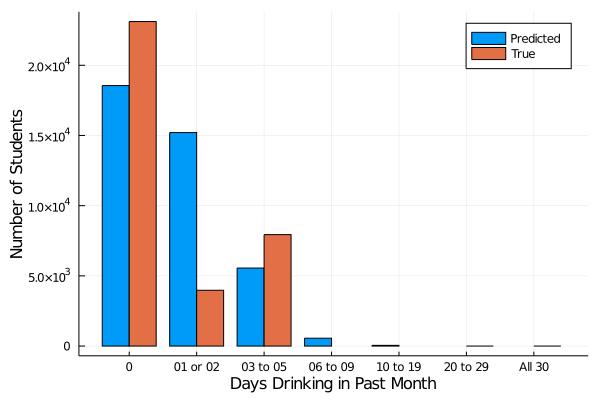

In [72]:
pred_counts=[(count(x->x==i,val_pred)) for i in [1,2,3,4,5,6,7]]

u=unique(val_y1)
y_counts=[(count(x->x==i,val_y1)) for i in u]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 5)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [65]:
Xtrain = hcat(Array(train_x), ones(ntrain))
Xval = hcat(Array(val_x), ones(nval))
loss = BvSLoss(8)
mul!(loss, 1/n)
w = proxgrad(loss, ZeroReg(), Xtrain, train_y1, stepsize=1, maxiters=200)

257×7 Array{Float64,2}:
 -0.00841362   -0.0147499   -0.0189672    …  -0.0303854   -0.0341593
 -0.00507549   -0.00449816  -0.0049898       -0.00824068  -0.0098723
 -0.01145      -0.0148328   -0.0140478       -0.0117412   -0.0134796
 -0.00280176   -0.00964899  -0.0159421       -0.0265121   -0.029243
  0.000374164   0.00171127   0.000268146     -0.0258864   -0.0999772
 -0.0109249    -0.016249    -0.0155439    …  -0.0134061   -0.0364261
 -0.00159661   -0.00201217  -0.00227555      -0.00275995  -0.0025995
 -0.00266481   -0.00352657  -0.00365296      -0.00328989  -0.00387073
 -0.00266376   -0.0032466   -0.00341027      -0.00336154  -0.00392256
 -0.00440591   -0.00506887  -0.00491763      -0.00360427  -0.00381011
 -0.00440772   -0.00436447  -0.00415176   …  -0.00353733  -0.00386029
 -0.00513753   -0.0046538   -0.00434747      -0.00352359  -0.00384027
 -0.00639437   -0.00554957  -0.00491692      -0.00373718  -0.00391107
  ⋮                                       ⋱   ⋮           
 -0.00262103   

In [66]:
train_pred = impute(loss, Xtrain*w)
val_pred = impute(loss, Xval*w)

39928×1 Array{Number,2}:
 1
 1
 1
 1
 1
 1
 1
 1
 2
 1
 2
 2
 3
 ⋮
 1
 1
 2
 2
 2
 1
 2
 1
 2
 2
 1
 1

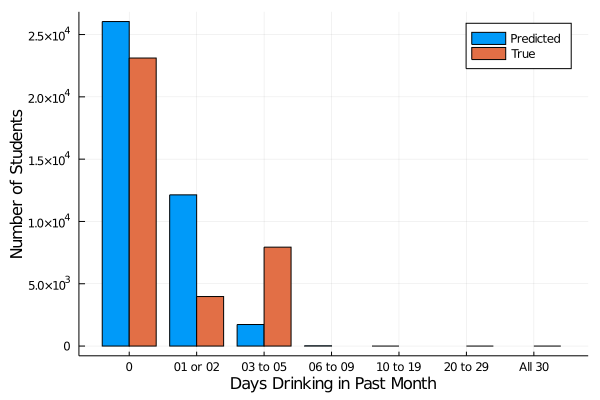

In [67]:
pred_counts=[(count(x->x==i,val_pred)) for i in [1,2,3,4,5,6,7]]

u=unique(val_y1)
y_counts=[(count(x->x==i,val_y1)) for i in u]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 5)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

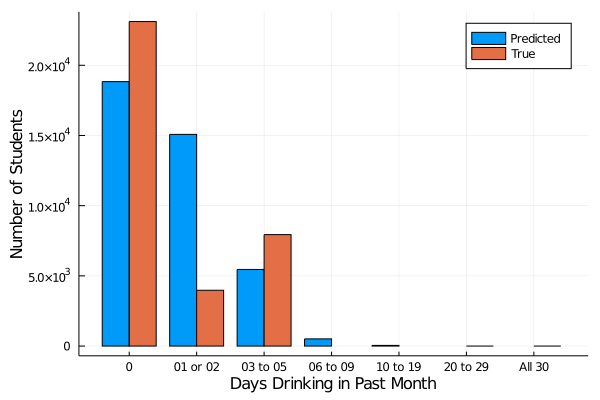

In [92]:
k_all = [10, 25, 50]
U, S, V = svd(Xtrain)


#for k in k_all
    #println(k)

Uk = U[:, 1:10];
Sk = S[1:10];
Vk = V[:, 1:10];

train_pca =  Xtrain * Vk
val_pca = Xval * Vk

# write your code for model fitting and prediction
w_pca = proxgrad(1/n*OrdinalHingeLoss(), ZeroReg(), train_pca, train_y1, stepsize=1, maxiters=200)

train_pred = impute(loss, train_pca*w_pca)
val_pred = impute(loss, val_pca*w_pca)

pred_counts=[(count(x->x==i,val_pred)) for i in [1,2,3,4,5,6,7]]

u=unique(val_y1)
y_counts=[(count(x->x==i,val_y1)) for i in u]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 5)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")
    
#end

In [93]:
train_pca

119785×10 Array{Float64,2}:
   -9.6185   -26.0493      6.55136  …   1.07146    0.699321     1.24803
   -5.55023  -24.4176      1.70543      2.41119    1.26908      2.90903
  -68.6186     0.0482968  -4.91446     -2.0189     1.30333     -0.671199
   -3.27143  -25.2226      4.23759     -1.22101   -0.529891     3.752
  -88.789      5.24598    -6.99527     -0.935414   2.5535      -2.7153
  -71.5899     0.338276   -2.67043  …  -0.708143  -0.661039    -0.240596
   -8.03928  -24.058      -3.07816      3.3073     1.00556     -1.80908
  -77.2897     0.678293   -3.87851     -1.61962   -1.11753     -1.38535
  -55.0028   -11.685       3.69676      1.56197    0.814454     0.416583
  -12.5932   -20.9688     -4.12849     -1.92207   -0.0306348   -7.25888
   -9.51981  -22.1471     -3.56877  …   0.272073  -1.00233      2.02938
  -55.5876    -5.77102    -2.66578     -2.00876    0.883588    -4.0962
  -63.2216   -11.5778      7.81369     -3.19648   -3.35778     -3.16475
    ⋮                               ⋱

In [89]:
Xtrain[1,:]

257-element Array{Float64,1}:
  6.0
  1.0
  1.0
  6.0
  1.8099051915431705
 -2.386241993618884
  1.0
  1.0
  1.0
  1.0
  0.0
  1.0
  0.0
  ⋮
  6.0
  2.0
  2.0
  2.0
  3.0
  8.0
  1.0
  1.0
  1.0
  4.0
  4.0
  1.0